In [20]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#loading in list of all RRNA, 
rrna_genes=pd.read_csv('mart_export.txt', sep='\t') 
rrna_genes_list= rrna_genes['Gene stable ID'].tolist() #568

# List of rrna ids that just map to the subunits of the ribosome
primary_subunits= rrna_genes[rrna_genes['Gene name'].str.contains('^[2-5]')]
primary_subunits_list= primary_subunits['Gene stable ID'].tolist() #picking out the ensemble ids

all_counts = pd.read_csv('all_salmon_norm_quant_rrna.tsv') #main counts file from salmon 58,037 rows
column_names = all_counts.drop('gene_id', 1) # name of all the samples in a list
polya_columns = pd.read_csv('polyseq.csv', sep=',', squeeze=True).tolist() # name of of the polyA samples 
ribo_columns = column_names.columns.difference(polya_columns) # name of all the ribo-samples


#Creating a sliced row to compare the Ensemble ids
all_counts['Sliced_Ids'] = all_counts.gene_id.str[:15]

#each varable is checking if the respective list of ids is in the total salmon file, and capturing the matches
rrna_ids= all_counts[all_counts['Sliced_Ids'].isin(rrna_genes_list)] # 543 rows
non_rrna_ids= all_counts[~all_counts['Sliced_Ids'].isin(rrna_genes_list)] #57494
primary_subunit_ids= all_counts[all_counts['Sliced_Ids'].isin(primary_subunits_list)]


#polyA counts creating lists
polya_total_counts = all_counts.loc[range(len(all_counts)),polya_columns].sum().tolist()
polya_rrna_counts = rrna_ids.loc[range(len(all_counts)),polya_columns].sum().tolist()
polya_non_rrna_counts = non_rrna_ids.loc[range(len(all_counts)),polya_columns].sum().tolist()
polya_primary_subunits_counts = primary_subunit_ids.loc[range(len(all_counts)),polya_columns].sum().tolist()

#converting lists to numpy arrays so I can divide the arrays together
polya_total_reads_array= np.array(polya_total_counts, dtype=np.float)
polya_rrna_reads_array= np.array(polya_rrna_counts, dtype=np.float)
polya_non_rrna_array= np.array(polya_non_rrna_counts, dtype=np.float)
polya_primary_subunit_array= np.array(polya_primary_subunits_counts, dtype=np.float)


#dividing the summed counts
poly_norm = polya_rrna_reads_array/polya_non_rrna_array #rrna/total-rrna
poly_total = polya_rrna_reads_array/polya_total_reads_array #rrna/totalsum
poly_sum_subunits = polya_primary_subunit_array/polya_total_reads_array #primary/totalsum



#riboD counts creating lists
ribod_total_counts = all_counts.loc[range(len(all_counts)),ribo_columns].sum().tolist() #sum of all counts
ribod_rrna_counts = rrna_ids.loc[range(len(all_counts)),ribo_columns].sum(axis=0).tolist() #sum of just rrna
ribod_non_rrna_counts= non_rrna_ids.loc[range(len(all_counts)),ribo_columns].sum(axis=0).tolist() #sum of total-rrna
ribod_primary_subunits_counts = primary_subunit_ids.loc[range(len(all_counts)),ribo_columns].sum().tolist() #sum of primary

#converting lists to numpy arrays so I can divide the arrays together
ribod_total_reads_array= np.array(ribod_total_counts, dtype=np.float)
ribod_rrna_reads_array= np.array(ribod_rrna_counts, dtype=np.float)
ribod_non_rrna_array= np.array(ribod_non_rrna_counts, dtype=np.float)
ribod_primary_subunit_array= np.array(ribod_primary_subunits_counts, dtype=np.float)


#dividing the summed counts
ribod_norm = ribod_rrna_reads_array/ribod_non_rrna_array #rrna/total-rrna
ribod_total = ribod_rrna_reads_array/ribod_total_reads_array #rrna/totalsum
ribod_sum_subunits = ribod_primary_subunit_array/ribod_total_reads_array #primary/totalsum



array([  6.85575928e-07,   5.80031396e-07,   1.35420495e-06,
         2.43889145e-06,   1.69794255e-06,   1.56974544e-06,
         2.11847279e-06,   1.66954766e-06,   1.26910218e-06,
         2.00632802e-06,   1.55526839e-06,   7.34178474e-07,
         8.06536330e-07])

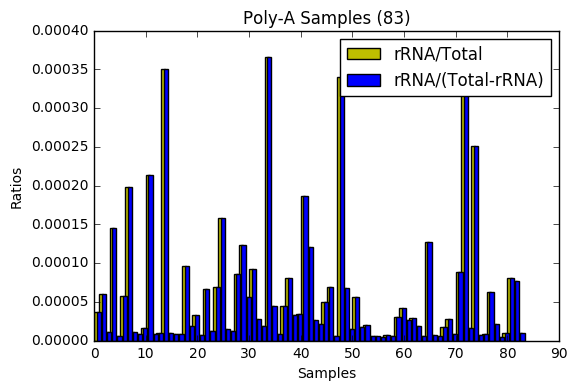

In [22]:
N = 83 #number of samples
ypoly_total= poly_total #=rrna/total
ypoly_norm = poly_norm #rrna/norm-rrna

ind = np.arange(N)  # the x locations for the groups
width = .5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ypoly_total, color='y')


rects2 = ax.bar(ind + width, ypoly_norm, color='b')

# Adding labels
ax.set_ylabel('Ratios')
ax.set_xlabel('Samples')
ax.set_title('Poly-A Samples (83)')
ax.legend((rects1[0], rects2[0]), ('rRNA/Total', 'rRNA/(Total-rRNA)'))

plt.show()

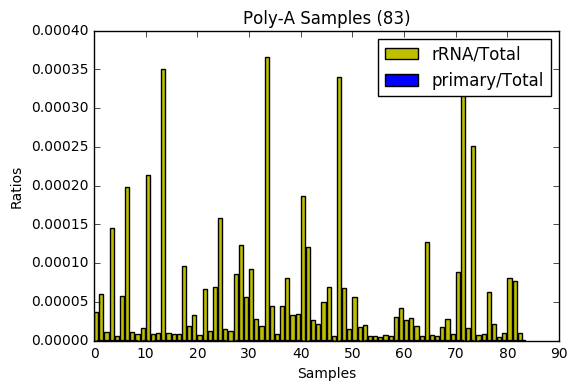

In [23]:
N = 83 #number of samples
ypoly_total= poly_total #=rrna/total
ypoly_sum = poly_sum_subunits #primary/total

ind = np.arange(N)
width = .5       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ypoly_total, color='y')


rects2 = ax.bar(ind + width, ypoly_sum, color='b')

# Adding labels
ax.set_ylabel('Ratios')
ax.set_xlabel('Samples')
ax.set_title('Poly-A Samples (83)')
ax.legend((rects1[0], rects2[0]), ('rRNA/Total', 'primary/Total'))

plt.show()

In [24]:
print('Mean of rRNA/Norm ', poly_total.mean())
print()
print('Mean of rRNA/Total-rRNA', poly_norm.mean())
print()
print('Mean of primary/Total', poly_sum_subunits.mean())



Mean of rRNA/Norm  6.05826709352e-05

Mean of rRNA/Total-rRNA 6.0593375651e-05

Mean of primary/Total 1.49079390681e-07


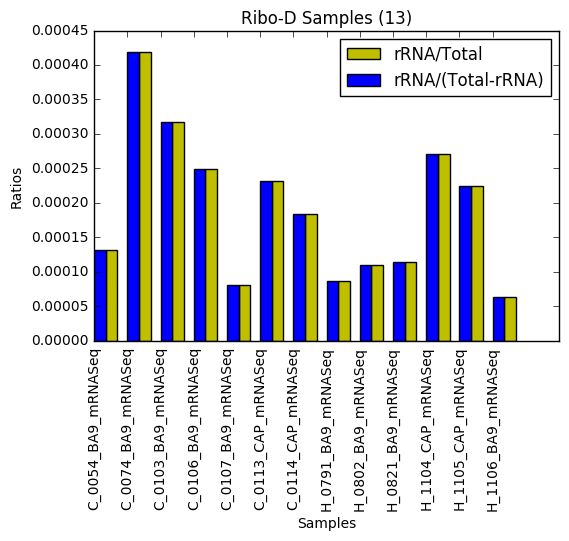

In [25]:
N = 13 #number of samples
yribo_total= ribod_total #rrna/total
yribo_norm = ribod_norm #rrna/norm-rrna

ind = np.arange(N)  # the x locations for the groups
width = .35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind + width, yribo_total, width, color='y')


rects2 = ax.bar(ind, yribo_norm, width, color='b')

# Adding labels
ax.set_ylabel('Ratios')
ax.set_xlabel('Samples')
plt.xticks(ind, ribo_columns, rotation='vertical')
ax.set_title('Ribo-D Samples (13)')
ax.legend((rects1[0], rects2[0]), ('rRNA/Total', 'rRNA/(Total-rRNA)'))

plt.show()

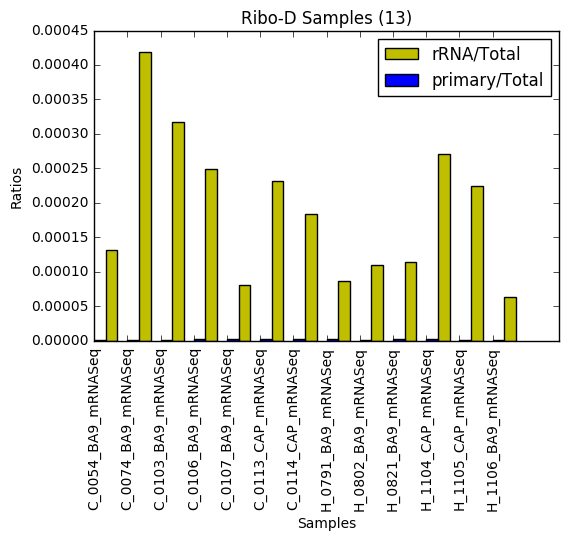

In [26]:
N = 13 #number of samples
yribo_total= ribod_total #rrna/total
yribo_sum = ribod_sum_subunits #rrna/norm-rrna

ind = np.arange(N)  # the x locations for the groups
width = .35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind + width, yribo_total, width, color='y')


rects2 = ax.bar(ind, yribo_sum, width, color='b')

# Adding labels
ax.set_ylabel('Ratios')
ax.set_xlabel('Samples')
plt.xticks(ind, ribo_columns, rotation='vertical')
ax.set_title('Ribo-D Samples (13)')
ax.legend((rects1[0], rects2[0]), ('rRNA/Total', 'primary/Total'))

plt.show()

In [27]:
print('Mean of rRNA/Norm ', ribod_total.mean())
print()
print('Mean of rRNA/Total-rRNA ', ribod_norm.mean())
print()
print('Mean of primary/Total ', ribod_sum_subunits.mean())

Mean of rRNA/Norm  0.000190610100192

Mean of rRNA/Total-rRNA  0.000190656872668

Mean of primary/Total  1.42198658187e-06


In [45]:
# stats = pd.DataFrame(columns=['RiboD rRNA/Total','PolyA rRNA/Total','RiboD rRNA/Total-rRNA','PolyA rRNA/Total-rRNA','RiboD primary/Total','PolyA primary/Total'], index=index)

# #stats['RiboD rRNA/Total']=(ribod_total.mean())

# # stats['RiboD rRNA/Total-rRNA']=ribod_norm.mean()
# # stats['RiboD primary/Total']=ribod_sum_subunits.mean()

# # stats['PolyA rRNA/Total']=poly_total.mean()
# # stats['PolyA rRNA/Total-rRNA']=poly_norm.mean()
# # stats['PolyA primary/Total']=poly_sum_subunits.mean()
# stats

NameError: name 'index' is not defined